### Esercizio 7.3/7.4

Ho completato il codice di dinamica molecare implementando il calcolo della funzione di distribuzione radiale $g(r)$ e 
la misurazione della pressione. Ora confronto i risultati ottenuti dal codice NVT con quelli del codice MD. 

I due metodi dovrebbero portare allo stesso risultato, infatti eseguono la stessa analisi soltanto in due modi diversi. In particolare il codice di dinamica molecolare risolve le equazioni del moto con l' algoritmo di Verlet, mentre il Monte carlo NVT utilizza il Metropolis e quindi è di natura puramente stocastica.


Nel NVT ho utilizzato i parametri dedotti dall' analisi degli esercizi precedenti così come per il codice di dinamica molecolare. Riporto i risultai per l' Argon nelle tra fasi di Energia potenziale, pressione per l' NVT e confronto le $g(r)$ di NVT e MD. 

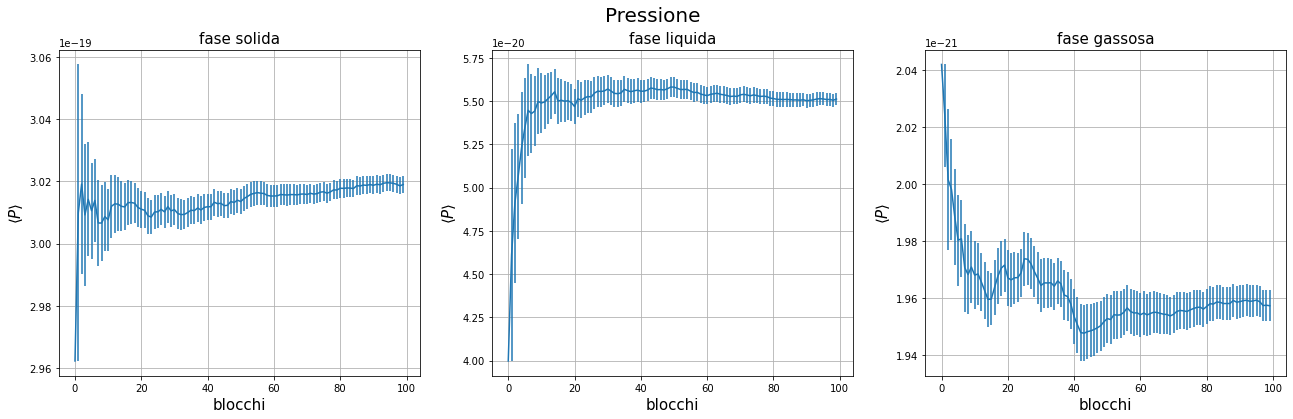

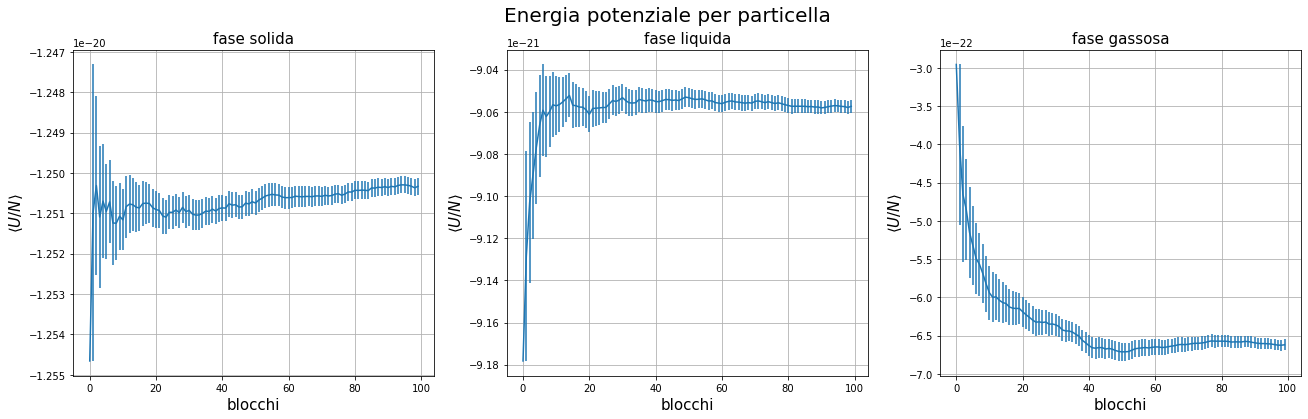

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k

with open("NVT_data/output.pres.solid") as SP_out:
    SP=np.loadtxt(SP_out)
with open("NVT_data/output.epot.solid") as SU_out:
    SU=np.loadtxt(SU_out)

with open("NVT_data/output.pres.liquid") as LP_out:
    LP=np.loadtxt(LP_out)
with open("NVT_data/output.epot.liquid") as LU_out:
    LU=np.loadtxt(LU_out)

with open("NVT_data/output.pres.gas") as GP_out:
    GP=np.loadtxt(GP_out)
with open("NVT_data/output.epot.gas") as GU_out:
    GU=np.loadtxt(GU_out)

    
#Unità SI
eps = 120*k
sigma = (1/24)**(1/3)

SU *= eps
LU *= eps
GU *= eps

SP *= eps/sigma**3
LP *= eps/sigma**3
GP *= eps/sigma**3

    
    
nblocks=100
x=np.arange(nblocks)

fig1=plt.figure(figsize=(22,6))
fig1.suptitle("Pressione",fontsize=20)
ax1=fig1.add_subplot(1,3,1)
ax2=fig1.add_subplot(1,3,2)
ax3=fig1.add_subplot(1,3,3)
#plot
ax1.errorbar(x,SP[:,2],yerr=SP[:,3])
ax2.errorbar(x,LP[:,2],yerr=LP[:,3])
ax3.errorbar(x,GP[:,2],yerr=GP[:,3])
#titoli
ax1.set_title("fase solida",fontsize=15)
ax2.set_title("fase liquida",fontsize=15)
ax3.set_title("fase gassosa",fontsize=15)
#labeò assi
ax1.set_xlabel("blocchi",fontsize=15)
ax1.set_ylabel(r"$\langle P \rangle$",fontsize=15)
ax2.set_xlabel("blocchi",fontsize=15)
ax2.set_ylabel(r"$\langle P \rangle$",fontsize=15)
ax3.set_xlabel("blocchi",fontsize=15)
ax3.set_ylabel(r"$\langle P \rangle$",fontsize=15)
#griglie
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
plt.show()
    
    
fig2=plt.figure(figsize=(22,6))
fig2.suptitle("Energia potenziale per particella",fontsize=20)
ax1=fig2.add_subplot(1,3,1)
ax2=fig2.add_subplot(1,3,2)
ax3=fig2.add_subplot(1,3,3)
#plot
ax1.errorbar(x,SU[:,2],yerr=SU[:,3])
ax2.errorbar(x,LU[:,2],yerr=LU[:,3])
ax3.errorbar(x,GU[:,2],yerr=GU[:,3])
#titoli
ax1.set_title("fase solida",fontsize=15)
ax2.set_title("fase liquida",fontsize=15)
ax3.set_title("fase gassosa",fontsize=15)
#labeò assi
ax1.set_xlabel("blocchi",fontsize=15)
ax1.set_ylabel(r"$\langle U/N \rangle$",fontsize=15)
ax2.set_xlabel("blocchi",fontsize=15)
ax2.set_ylabel(r"$\langle U/N \rangle$",fontsize=15)
ax3.set_xlabel("blocchi",fontsize=15)
ax3.set_ylabel(r"$\langle U/N \rangle$",fontsize=15)
#griglie
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
plt.show()

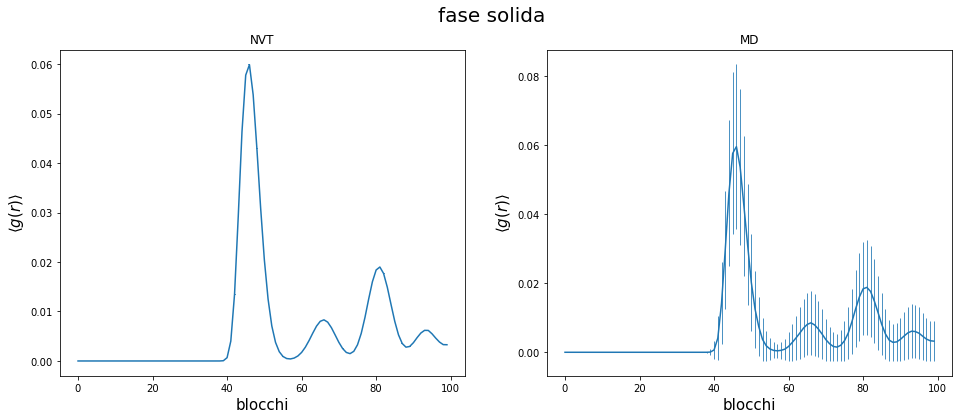

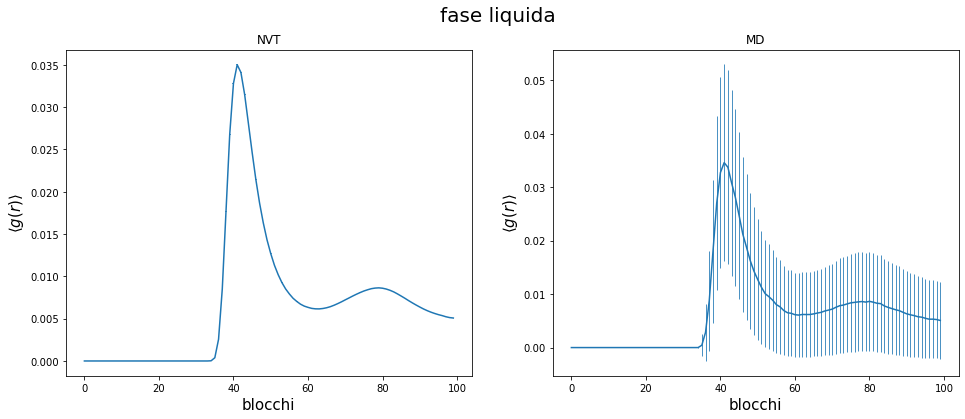

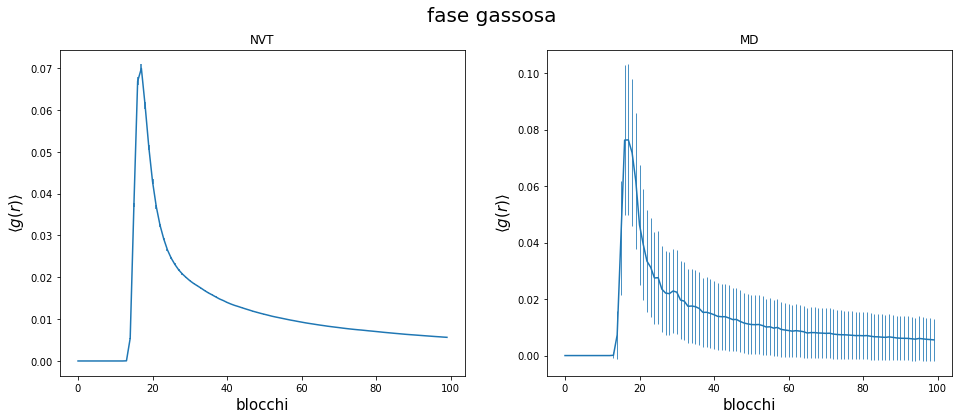

In [9]:
with open("MD_data/ave_gr.solid") as SGR_MD_out:
    SGR_MD=np.loadtxt(SGR_MD_out)
with open("MD_data/ave_gr.liquid") as LGR_MD_out:
    LGR_MD=np.loadtxt(LGR_MD_out)
with open("MD_data/ave_gr.gas") as GGR_MD_out:
    GGR_MD=np.loadtxt(GGR_MD_out)
    
with open("NVT_data/output.gave.solid") as SGR_NVT_out:
    SGR_NVT=np.loadtxt(SGR_NVT_out)
with open("NVT_data/output.gave.liquid") as LGR_NVT_out:
    LGR_NVT=np.loadtxt(LGR_NVT_out)
with open("NVT_data/output.gave.gas") as GGR_NVT_out:
    GGR_NVT=np.loadtxt(GGR_NVT_out)
    
nblocks=100
x=np.arange(100)
fig1=plt.figure(figsize=(16,6))
fig1.suptitle("fase solida",fontsize=20)
ax1=fig1.add_subplot(1,2,1)
ax2=fig1.add_subplot(1,2,2)

ax1.errorbar(x,SGR_NVT[:,0],yerr=SGR_NVT[:,1])
ax2.errorbar(x,SGR_MD[:,0],yerr=SGR_MD[:,1],elinewidth=0.8)
#titoli grafici
ax1.set_title("NVT")
ax2.set_title("MD")
#label assi
ax1.set_xlabel("blocchi",fontsize=15)
ax1.set_ylabel(r"$\langle  g(r) \rangle$",fontsize=15)
ax2.set_xlabel("blocchi",fontsize=15)
ax2.set_ylabel(r"$\langle  g(r) \rangle$",fontsize=15)

plt.show()

fig2=plt.figure(figsize=(16,6))
fig2.suptitle("fase liquida",fontsize=20)
ax1=fig2.add_subplot(1,2,1)
ax2=fig2.add_subplot(1,2,2)

ax1.errorbar(x,LGR_NVT[:,0],yerr=LGR_NVT[:,1])
ax2.errorbar(x,LGR_MD[:,0],yerr=LGR_MD[:,1],elinewidth=0.8)
#titoli grafici
ax1.set_title("NVT")
ax2.set_title("MD")
#label assi
ax1.set_xlabel("blocchi",fontsize=15)
ax1.set_ylabel(r"$\langle  g(r) \rangle$",fontsize=15)
ax2.set_xlabel("blocchi",fontsize=15)
ax2.set_ylabel(r"$\langle  g(r) \rangle$",fontsize=15)

plt.show()


fig3=plt.figure(figsize=(16,6))
fig3.suptitle("fase gassosa",fontsize=20)
ax1=fig3.add_subplot(1,2,1)
ax2=fig3.add_subplot(1,2,2)

ax1.errorbar(x,GGR_NVT[:,0],yerr=GGR_NVT[:,1])
ax2.errorbar(x,GGR_MD[:,0],yerr=GGR_MD[:,1],elinewidth=0.8)
#titoli grafici
ax1.set_title("NVT")
ax2.set_title("MD")
#label assi
ax1.set_xlabel("blocchi",fontsize=15)
ax1.set_ylabel(r"$\langle  g(r) \rangle$",fontsize=15)
ax2.set_xlabel("blocchi",fontsize=15)
ax2.set_ylabel(r"$\langle  g(r) \rangle$",fontsize=15)

plt.show()

Come si vede dai grafici le funzioni di distribuzione radiale per il MC NVT e per il codice MD hanno andamenti analoghi.